# Data visualisation

In [1]:
import os
import pandas as pd
import glob
import json
data_path = "../data/interim/v4"
test_cases = [file.split("-")[2] for file in glob.glob(f"{data_path}/*stage_5*.csv")]
# List test cases in dataset
for i,test_case in enumerate(test_cases):
    print(i,test_case)


0 milenkosRoomNearDevicesWithTraffic
1 milenkoParkWithTraffic
2 milenkosRoomNearDevicesWithTraffic1
3 milenkoParkWithTraffic1
4 milenkosKitchenNotNearDevicesWithTraffic1
5 milenkosKitchenNotNearDevicesWithTraffic


In [40]:
# read all data in dataset
data_off = {test_case: pd.read_csv(glob.glob(f"{data_path}/*stage_5*{test_case}*")[0]) for test_case in test_cases}
data_on = {test_case: pd.read_csv(glob.glob(f"{data_path}/*stage_6*{test_case}*")[0]) for test_case in test_cases}

# extract one sample from data
i = 3
df_on = data_on[test_cases[i]]
df_off = data_off[test_cases[i]]

In [41]:
def add_intensity(df: pd.DataFrame):
    """
    add Intensity as 2nd norm of 3D vector
    """
    df["Intensity"] = (df["X_UnCal"] ** 2 + df["Y_UnCal"] ** 2 + df["Z_UnCal"] ** 2) ** 0.5

add_intensity(df_on)
add_intensity(df_off)
for key in data_off.keys():
    add_intensity(data_off[key])
for key in data_on.keys():
    add_intensity(data_on[key])

In [42]:
df_on[['X_UnCal', 'Y_UnCal', 'Z_UnCal', 'Intensity', 'X_Bias', 'Y_Bias', 'Z_Bias']].describe()

,X_UnCal,Y_UnCal,Z_UnCal,Intensity,X_Bias,Y_Bias,Z_Bias
count,6002.000000,6002.000000,6002.000000,6002.000000,6.002000e+03,6.002000e+03,6002.00000
mean,-33.455725,58.611702,-76.533843,102.053582,-1.741481e+01,4.883710e+01,-32.69565
std,1.638925,0.501189,1.307051,1.325853,7.106019e-15,7.106019e-15,0.00000
min,-54.424200,53.070000,-89.792000,94.706865,-1.741481e+01,4.883711e+01,-32.69565
25%,-33.794000,58.364800,-76.921000,101.452069,-1.741481e+01,4.883711e+01,-32.69565
50%,-33.220600,58.621000,-76.445200,101.899838,-1.741481e+01,4.883711e+01,-32.69565
75%,-32.696000,58.889400,-75.923650,102.344849,-1.741481e+01,4.883711e+01,-32.69565
max,-25.973799,66.917000,-61.780800,117.805710,-1.741481e+01,4.883711e+01,-32.69565


In [43]:
df_off[['X_UnCal', 'Y_UnCal', 'Z_UnCal', 'Intensity', 'X_Bias', 'Y_Bias', 'Z_Bias']].describe()

,X_UnCal,Y_UnCal,Z_UnCal,Intensity,X_Bias,Y_Bias,Z_Bias
count,5998.000000,5998.000000,5998.000000,5998.000000,5.998000e+03,5.998000e+03,5998.00000
mean,-36.101823,57.877054,-77.588818,103.317230,-1.741481e+01,4.883711e+01,-32.69565
std,1.097864,0.360781,0.764768,0.767947,7.106020e-15,7.106020e-15,0.00000
min,-47.872800,54.912197,-84.131195,100.995317,-1.741481e+01,4.883711e+01,-32.69565
25%,-36.795200,57.657200,-77.982400,102.845848,-1.741481e+01,4.883711e+01,-32.69565
50%,-36.185200,57.876800,-77.567600,103.315567,-1.741481e+01,4.883711e+01,-32.69565
75%,-35.404400,58.108600,-77.128395,103.746563,-1.741481e+01,4.883711e+01,-32.69565
max,-32.781400,59.231000,-75.335000,109.228455,-1.741481e+01,4.883711e+01,-32.69565


# Trying statistical features

In [44]:
def statistical_features(df: pd.DataFrame, column_name='Intensity'):
    return df[column_name].describe().to_dict()
statistical_features(df_on)

{'count': 6002.0,
 'mean': 102.05358195401246,
 'std': 1.3258527675846399,
 'min': 94.70686549629019,
 '25%': 101.45206882625213,
 '50%': 101.89983782782797,
 '75%': 102.34484922310784,
 'max': 117.80570982465164}

In [45]:
columns = ['X_UnCal', 'Y_UnCal', 'Z_UnCal', 'Intensity']
data_on_statistics = {name: {column: statistical_features(df, column) for column in columns} for name, df in data_on.items()}
data_off_statistics = {name: {column: statistical_features(df, column) for column in columns} for name, df in data_off.items()}

## Best feature: standard diviation on intensity
- biggest difference when no devices nearby (park, even room without devices)

In [46]:
statistics = 'std'
# one of ["count", "mean", "std", "min", "25%", "50%", "75%", "max"]
column = 'Intensity'
# one of ['X_UnCal', 'Y_UnCal', 'Z_UnCal', 'Intensity']


name_len = max([len(test_case) for test_case in test_cases])
print(f"Comparison of '{statistics}' statistic for {column} between modes in same test_session")
print(f"{'test_case':<{name_len}}  {'on':<8} {'off':<8} {'percentage diff'}")
print('-'*(35+name_len))
for test_case in test_cases:
    on = data_on_statistics[test_case][column][statistics]
    off = data_off_statistics[test_case][column][statistics]
    print(f"{test_case:<{name_len}} {on : .5f} {off : .5f} {(on - off) / on : .5f}")

Comparison of 'std' statistic for Intensity between modes in same test_session
test_case                                  on       off      percentage diff
----------------------------------------------------------------------------
milenkosRoomNearDevicesWithTraffic         0.73922  0.62669  0.15222
milenkoParkWithTraffic                     1.32585  0.85173  0.35760
milenkosRoomNearDevicesWithTraffic1        0.73922  0.68290  0.07619
milenkoParkWithTraffic1                    1.32585  0.76795  0.42079
milenkosKitchenNotNearDevicesWithTraffic1  1.07927  0.70414  0.34758
milenkosKitchenNotNearDevicesWithTraffic   1.33533  0.70414  0.47268


generate dataset from statistical features

In [54]:
start = 3000
size = 300

<AxesSubplot: title={'center': 'Stage All on'}>

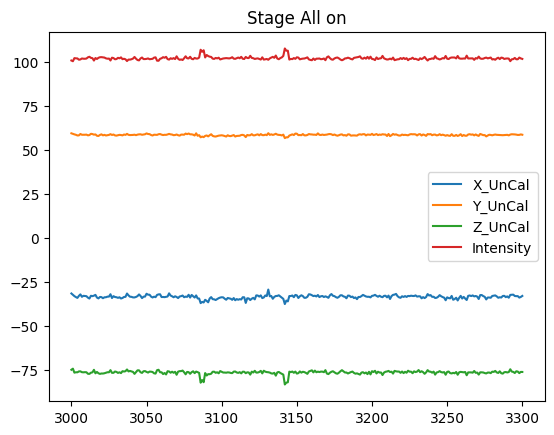

In [55]:
df_on[['X_UnCal', 'Y_UnCal', 'Z_UnCal', 'Intensity']].loc[start:start+size].plot(title="Stage All on")

<AxesSubplot: title={'center': 'Stage All off'}>

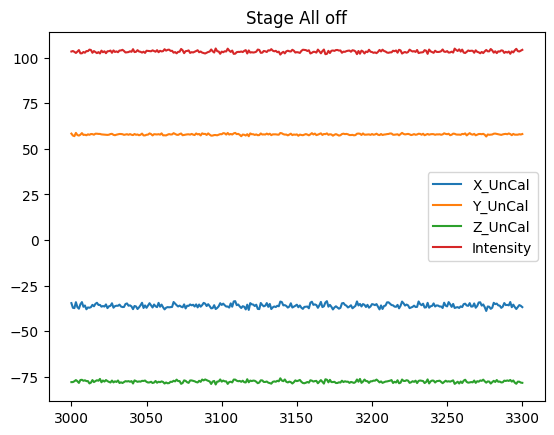

In [56]:
df_off[['X_UnCal', 'Y_UnCal', 'Z_UnCal', 'Intensity']].loc[start:start+size].plot(title="Stage All off")

# Fourier

## time and frequency
Timestamps are not reliable, also the difference is weird, so we will assume, data sampling ran for 60s (this was set in the app)

         fourier
bins            
1     208.424599
2       1.058284
3       0.927124
4       0.953668
5       1.121218
6       1.235709
7       0.980796
8       0.732894
9       0.787704
10      1.851247
11      0.786272
12      0.752325
13      0.682672
14      0.878005
15      0.850114
16      1.115601
17      0.762682
18      1.471917
19      0.865966
20      1.255293
21      0.817372
22      0.877261
23      0.694946
24      0.888341
25      0.830606
26      0.863992
27      0.800784
28      0.743461
29      0.900797
30      1.606604
31      1.129851
32      0.741037
33      0.823559
34      0.736709
35      1.318581
36      1.285724
37      0.749707
38      0.748944
39      0.814139
40      1.035582
41      0.942030
42      0.716200
43      0.710728
44      0.854296
45      1.100951
46      0.827148
47      0.975294
48      0.734065
49      1.481964


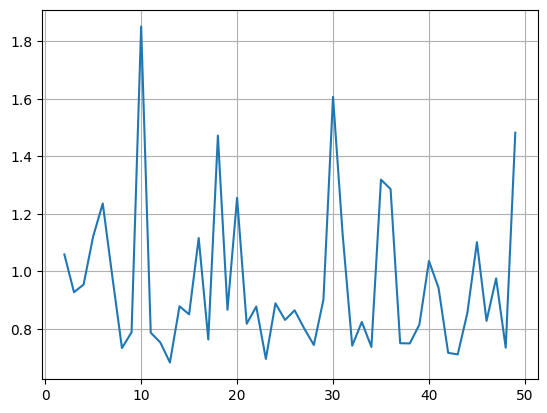

In [59]:
from scipy.fft import fft, fftfreq
import numpy as np
from matplotlib import pyplot as plt

def spectral_image(df: pd.DataFrame, column = 'Intensity', duration = 60):
    N = len(df)
    sampling_rate = N // duration
    T = 1 / sampling_rate

    yf = fft(df[column].to_numpy())

    # just right side
    yff = 2.0/N * np.abs(yf[0:N//2])
    xf = fftfreq(N, T)[:N//2]

    bins = np.array(range(round(xf[-1])))
    inds = np.digitize(xf, bins)
    df = pd.DataFrame({"bins": inds, "fourier": yff})
    groupped = df.groupby("bins").sum()
    return groupped


specter_intensity = spectral_image(df_off, 'Intensity', 60)
print(specter_intensity)
plt.plot(specter_intensity[1:])
plt.grid()
plt.show()

In [60]:
name = 'test'
label = 6
df = df_on
vec_len = 50
column = 'Intensity'
duration = 60
columns = ["Name", "Label"] + list(range(1,vec_len+1))

# loop
# set to constant 
def specter_to_data_row(name, label, df, vec_len, column = 'Intensity', duration = 60): 
    specter_intensity = spectral_image(df, column, duration)['fourier'].to_numpy()[:vec_len]
    padded = np.zeros((vec_len))
    padded[:specter_intensity.shape[0]] = specter_intensity
    data_row = [name, label] + list(padded)
    return data_row

data_on = pd.DataFrame([specter_to_data_row(name, 6, df, vec_len=50, column='Intensity') for name, df in data_on.items()], columns=columns)
data_off = pd.DataFrame([specter_to_data_row(name, 5, df, vec_len=50, column='Intensity') for name, df in data_off.items()], columns=columns)

#data_on.loc[:, df.columns != ]# .T.describe()
print(data_on[data_on.columns[3:]].T.describe())
print(data_off[data_off.columns[3:]].T.describe())


ZeroDivisionError: division by zero

In [ ]:

data_fourier = data_on.append(data_off, ignore_index=True)
data_fourier = data_fourier.sort_values(by=['Label', 'Name'], ignore_index = True)
data_fourier

/tmp/ipykernel_10019/1856889821.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_fourier = data_on.append(data_off, ignore_index=True)


,Name,Label,1,2,3,4,5,6,7,8,...,41,42,43,44,45,46,47,48,49,50
0,milenkoParkWithTraffic,5,208.954007,1.885467,1.392074,1.318190,1.266517,1.571256,0.992989,0.971404,...,0.945329,0.701906,0.750984,0.890428,1.204878,0.995232,0.918665,0.829230,1.436866,0.000000
1,milenkoParkWithTraffic1,5,208.424599,1.058284,0.927124,0.953668,1.121218,1.235709,0.980796,0.732894,...,0.942030,0.716200,0.710728,0.854296,1.100951,0.827148,0.975294,0.734065,1.481964,0.000000
2,milenkosKitchenNotNearDevicesWithTraffic,5,168.453778,0.974630,1.120406,1.064172,1.127108,1.095093,0.972606,0.927223,...,0.846910,0.876314,0.732221,0.906010,0.860373,0.970179,0.944701,0.744615,1.284665,0.000000
3,milenkosKitchenNotNearDevicesWithTraffic1,5,168.453778,0.974630,1.120406,1.064172,1.127108,1.095093,0.972606,0.927223,...,0.846910,0.876314,0.732221,0.906010,0.860373,0.970179,0.944701,0.744615,1.284665,0.000000
4,milenkosRoomNearDevicesWithTraffic,5,189.524600,0.869839,0.774755,0.830912,0.853075,0.863400,0.768938,0.866897,...,0.755662,0.739356,0.798758,0.672589,0.635958,0.785443,0.861385,0.712763,1.270794,0.000000
5,milenkosRoomNearDevicesWithTraffic1,5,190.332474,1.510417,0.922911,1.046790,0.885992,0.839672,0.712799,0.781436,...,0.874381,0.801606,0.688027,0.707440,0.722540,0.869910,0.902038,0.686330,1.330373,0.000000
6,milenkoParkWithTraffic,6,212.943795,3.678600,3.187768,2.057735,1.577903,1.542473,1.387643,1.368529,...,0.720865,0.903754,0.776841,0.782215,0.686031,0.781238,0.784216,0.784546,0.769260,0.731566
7,milenkoParkWithTraffic1,6,212.943795,3.678600,3.187768,2.057735,1.577903,1.542473,1.387643,1.368529,...,0.720865,0.903754,0.776841,0.782215,0.686031,0.781238,0.784216,0.784546,0.769260,0.731566
8,milenkosKitchenNotNearDevicesWithTraffic,6,173.455370,3.979339,2.646225,1.859706,1.567622,1.616556,1.375083,1.362271,...,0.929323,0.941948,0.910404,0.986444,1.036486,1.007861,1.038387,0.776776,1.514548,0.000000
9,milenkosKitchenNotNearDevicesWithTraffic1,6,171.594400,2.626623,1.736484,1.721143,1.231322,1.093425,1.279214,1.137726,...,0.702297,0.935235,0.993719,0.866949,0.838819,0.969299,1.184874,0.993744,1.013473,1.255919


[ 3.11868466e+04 +0.j          4.40003687e+01-46.21840124j
 -1.31055588e+01-31.09447519j -5.72641263e+00+12.73712605j
  1.80037984e+01-13.25540155j -1.00099241e+01-11.06514407j
 -6.37520220e+00-11.79816914j  7.80395881e+00+10.84965208j
  2.93418835e+00-13.83497935j -5.50937138e+00-12.44093103j
 -6.59751699e+00 +0.40197481j -8.05824552e+00-12.12181122j
 -1.18042704e+01 -3.99832579j -8.25089690e+00+23.67138479j
 -4.24411219e+00 +6.72133139j  6.68963625e+00 -2.47355j
  1.90919843e+01 +8.90493308j -1.32061476e+01-21.72682594j
 -5.08004152e-01-12.57663399j  1.07152995e+01+10.61033069j
  4.11194960e+00 +0.6194222j   1.31436883e+01 -2.66433161j
  2.68812221e+00-16.34197949j -8.70861776e+00 +2.82492352j
 -3.68190497e+00 -3.39899139j  9.48934837e+00 +0.17900468j
 -1.61797946e+00-10.1386411j  -1.79773298e+00-11.18157043j
 -5.65231895e+00 -8.26749674j -2.00053695e+01 -6.36541597j
  5.03666514e+01+22.97446028j  3.40503401e+00 +3.33016944j
  8.07892645e+00 +5.98218974j  8.85724128e+00 +1.95961609j


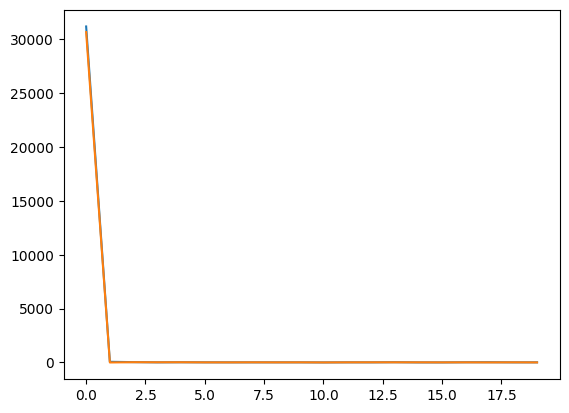

In [ ]:
from scipy.fft import fft, fftfreq, rfft, rfftfreq
from matplotlib import pyplot as plt
import numpy as np
yf_off = rfft(df_off['Intensity'].loc[start:start+size].to_numpy())
yf_on = rfft(df_on['Intensity'].loc[start:start+size].to_numpy())
# print(yf_off)
# n of samples, spacing
print(yf_off)
#xf = rfftfreq(len(x), (x[1] - x[0]) / 1000)
plt.plot(np.abs(yf_off[:20]))
plt.plot(np.abs(yf_on[:20]))
plt.show()